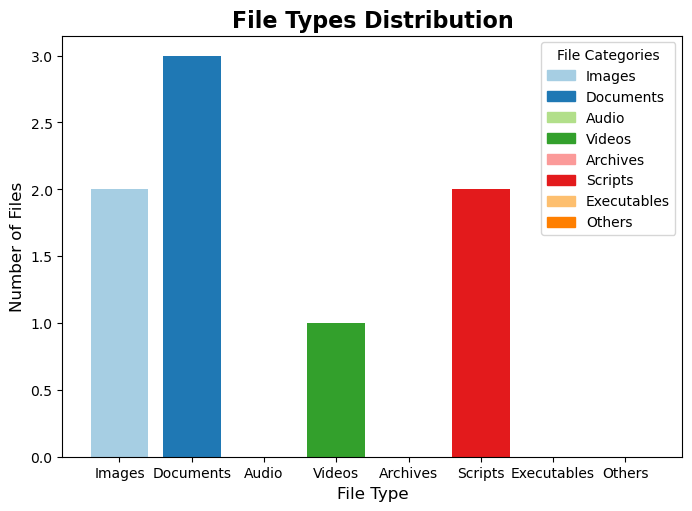

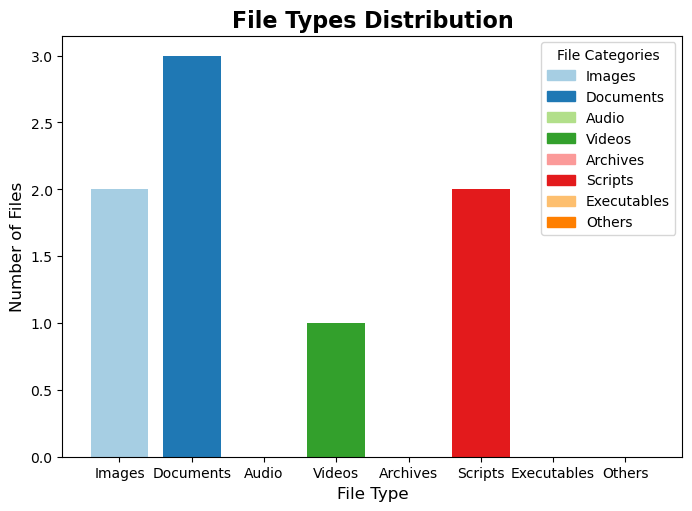

In [4]:
import os
import shutil
from tkinter import Tk, filedialog, Button, Label, Frame, StringVar, Toplevel
from tkinter import messagebox
import matplotlib.pyplot as plt
import tkinter.ttk as ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.patches as mpatches

# Define file types and their categories
FILE_TYPES = {
    "Images": [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"],
    "Documents": [".pdf", ".doc", ".docx", ".txt", ".xlsx", ".csv", ".pptx"],
    "Audio": [".mp3", ".wav", ".aac", ".flac"],
    "Videos": [".mp4", ".mkv", ".avi", ".mov", ".wmv"],
    "Archives": [".zip", ".rar", ".7z", ".tar", ".gz"],
    "Scripts": [".py", ".js", ".html", ".css", ".java", ".cpp", ".rb"],
    "Executables": [".exe", ".bat", ".sh"],
    "Others": []  # Default category for unknown file types
}

class FileOrganizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Dynamic Technocrat File Organizer")
        self.root.geometry("750x800")
        self.root.config(bg="#f0f0f0")  # Background color

        # Initialize variables
        self.folder_path = ""
        self.file_counts = {category: 0 for category in FILE_TYPES}
        self.files_in_folder = []

        # Create a frame for widgets
        self.frame = Frame(self.root, bg="#f0f0f0")
        self.frame.pack(pady=20)

        # Label for title
        self.title_label = Label(self.frame, text="Dynamic Technocrat File Organizer", 
                                 font=("Helvetica", 18, "bold"), fg="#333")
        self.title_label.grid(row=0, column=0, padx=10, pady=10)

        # Load Folder Button
        self.load_button = Button(self.frame, text="📂 Load Folder", font=("Helvetica", 14, "bold"), 
                                  fg="white", bg="#4CAF50", command=self.load_folder, relief="solid", 
                                  width=20, height=2)
        self.load_button.grid(row=1, column=0, padx=10, pady=10)

        # Display Folder Information
        self.folder_info_label = Label(self.frame, text="No folder selected", font=("Helvetica", 12), fg="#555")
        self.folder_info_label.grid(row=2, column=0, padx=10, pady=10)

        # File counts display
        self.file_count_label = Label(self.frame, text="File Count by Type: ", font=("Helvetica", 12), fg="#555")
        self.file_count_label.grid(row=3, column=0, padx=10, pady=10)

        # Categorize Button
        self.categorize_button = Button(self.frame, text="🔄 Categorize Files", font=("Helvetica", 14, "bold"), 
                                        fg="white", bg="#4CAF50", command=self.categorize_files, relief="solid", 
                                        width=20, height=2)
        self.categorize_button.grid(row=4, column=0, padx=10, pady=10)

        # Generate Report Button
        self.report_button = Button(self.frame, text="📊 Generate Report", font=("Helvetica", 14, "bold"), 
                                    fg="white", bg="#4CAF50", command=self.show_report_overlay, relief="solid", 
                                    width=20, height=2)
        self.report_button.grid(row=5, column=0, padx=10, pady=10)

        # Progress bar for loading indication
        self.progress = ttk.Progressbar(self.frame, orient="horizontal", length=400, mode="indeterminate")
        self.progress.grid(row=6, column=0, padx=10, pady=20)

        # Status Label
        self.status_label = Label(self.frame, text="Select a folder and load files", font=("Helvetica", 12), fg="#555")
        self.status_label.grid(row=7, column=0, padx=10, pady=10)

        # Bottom text
        self.footer_label = Label(self.root, text="Made with ❤️ by Dynamic Technocrat", font=("Helvetica", 10), fg="#777")
        self.footer_label.pack(side="bottom", pady=10)

    def load_folder(self):
        # Open a folder selection dialog
        folder_selected = filedialog.askdirectory(title="Select Folder to Load")
        
        if not folder_selected:
            messagebox.showwarning("Warning", "No folder selected. Please select a folder.")
            return
        
        self.folder_path = folder_selected
        self.files_in_folder = os.listdir(folder_selected)
        
        # Update folder information
        self.folder_info_label.config(text=f"Loaded Folder: {os.path.basename(self.folder_path)}")
        
        # Count files by type
        self.file_counts = {category: 0 for category in FILE_TYPES}
        
        for file_name in self.files_in_folder:
            file_path = os.path.join(self.folder_path, file_name)

            if os.path.isdir(file_path):
                continue  # Skip directories

            file_extension = os.path.splitext(file_name)[1].lower()
            for category, extensions in FILE_TYPES.items():
                if file_extension in extensions:
                    self.file_counts[category] += 1
                    break
        
        # Display file counts
        self.display_file_counts()

    def display_file_counts(self):
        # Display the count of each file type
        count_text = "\n".join([f"{category}: {count}" for category, count in self.file_counts.items()])
        self.file_count_label.config(text=f"File Count by Type: \n{count_text}")
        self.status_label.config(text="Ready to categorize files!")

    def categorize_files(self):
        if not self.folder_path:
            messagebox.showwarning("Warning", "No folder loaded. Please load a folder first.")
            return
        
        self.progress.start()
        self.status_label.config(text="Categorizing files, please wait...")
        
        try:
            for file_name in self.files_in_folder:
                file_path = os.path.join(self.folder_path, file_name)
                
                if os.path.isdir(file_path):
                    continue  # Skip directories

                file_extension = os.path.splitext(file_name)[1].lower()
                folder_name = "Others"

                for category, extensions in FILE_TYPES.items():
                    if file_extension in extensions:
                        folder_name = category
                        break

                category_folder_path = os.path.join(self.folder_path, folder_name)
                if not os.path.exists(category_folder_path):
                    os.makedirs(category_folder_path)
                shutil.move(file_path, os.path.join(category_folder_path, file_name))
            
            self.status_label.config(text="Files Categorized Successfully!")
            self.progress.stop()
        except Exception as e:
            self.status_label.config(text="Error categorizing files.")
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
            self.progress.stop()

    def show_report_overlay(self):
        # Create an overlay window
        overlay = Toplevel(self.root)
        overlay.title("Report")
        overlay.geometry("800x600")
        overlay.config(bg="#f0f0f0")
        overlay.transient(self.root)  # Keep the overlay on top of the main window

        # Close button
        Button(overlay, text="Close", command=overlay.destroy, bg="#d9534f", fg="white", 
               font=("Helvetica", 12, "bold")).pack(pady=10)

        # Display the chart
        self.plot_chart(self.file_counts, overlay)

    def plot_chart(self, file_type_counts, parent):
        # Create a bar chart to display the number of files per type
        categories = list(file_type_counts.keys())
        counts = list(file_type_counts.values())

        # Create figure and axis
        fig, ax = plt.subplots(figsize=(8, 6))

        # Assign gradient colors
        colors = plt.cm.Paired(range(len(categories)))
        bars = ax.bar(categories, counts, color=colors)

        ax.set_title('File Types Distribution', fontsize=16, fontweight="bold")
        ax.set_xlabel('File Type', fontsize=12)
        ax.set_ylabel('Number of Files', fontsize=12)

        # Create a legend
        legend_patches = [mpatches.Patch(color=colors[i], label=categories[i]) for i in range(len(categories))]
        ax.legend(handles=legend_patches, loc="upper right", title="File Categories")

        # Embed the Matplotlib figure in Tkinter using FigureCanvasTkAgg
        canvas = FigureCanvasTkAgg(fig, master=parent)
        canvas.draw()
        canvas.get_tk_widget().pack(fill="both", expand=True)

# Create the root Tkinter window
root = Tk()
app = FileOrganizerApp(root)
root.mainloop()
